In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import h5py
import numpy as np
import keras
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
base_dir = os.path.expanduser("~/data/tianchi-german")

path_training = os.path.join(base_dir, 'validation.h5')
path_validation = os.path.join(base_dir, 'validation.h5')
path_test = os.path.join(base_dir, 'round1_test_a_20181109.h5')

fid_training = h5py.File(path_training, 'r')
fid_validation = h5py.File(path_validation, 'r')
fid_test = h5py.File(path_test, 'r')

print(list(fid_training.keys()))
print(list(fid_validation.keys()))
print(list(fid_test.keys()))

print("-" * 60)
print("training part")
s1_training = fid_training['sen1']
print(s1_training.shape)
s2_training = fid_training['sen2']
print(s2_training.shape)
label_training = fid_training['label']
print(label_training.shape)

print("-" * 60)
print("validation part")
s1_validation = fid_validation['sen1']
print(s1_validation.shape)
s2_validation = fid_validation['sen2']
print(s2_validation.shape)
label_validation = fid_validation['label']
print(label_validation.shape)

print("-" * 60)
print("test part")
s1_test = fid_test['sen1']
print(s1_test.shape)
s2_test = fid_test['sen2']
print(s2_test.shape)

['label', 'sen1', 'sen2']
['label', 'sen1', 'sen2']
['sen1', 'sen2']
------------------------------------------------------------
training part
(24119, 32, 32, 8)
(24119, 32, 32, 10)
(24119, 17)
------------------------------------------------------------
validation part
(24119, 32, 32, 8)
(24119, 32, 32, 10)
(24119, 17)
------------------------------------------------------------
test part
(4838, 32, 32, 8)
(4838, 32, 32, 10)


In [3]:
validation = np.concatenate((s1_validation, s2_validation), axis=3)

In [4]:
validation.shape

(24119, 32, 32, 18)

In [5]:
s1_training = np.asarray(s1_training)
s1_training = s1_training.reshape(s1_training.shape[0], -1)

s2_training = np.asarray(s2_training)
s2_training = s2_training.reshape(s2_training.shape[0], -1)

In [6]:
data_training = np.hstack((s1_training, s2_training))
label_training = np.asarray(label_training)

print(data_training.shape)
print(label_training.shape)

(24119, 18432)
(24119, 17)


In [7]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(18432,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(17, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [8]:
history = model.fit(data_training, label_training, epochs=20, batch_size=128, validation_split=0.1)

Train on 21707 samples, validate on 2412 samples
Epoch 1/20
21707/21707 [==============================] - 24s 1ms/step - loss: 2.5418 - acc: 0.2668 - val_loss: 1.9788 - val_acc: 0.3918
Epoch 2/20
21707/21707 [==============================] - 13s 618us/step - loss: 1.9928 - acc: 0.3782 - val_loss: 1.6533 - val_acc: 0.5120
Epoch 3/20
21707/21707 [==============================] - 13s 603us/step - loss: 1.8189 - acc: 0.4190 - val_loss: 1.5234 - val_acc: 0.5062
Epoch 4/20
21707/21707 [==============================] - 12s 556us/step - loss: 1.7210 - acc: 0.4430 - val_loss: 1.4747 - val_acc: 0.5315
Epoch 5/20
21707/21707 [==============================] - 12s 549us/step - loss: 1.6454 - acc: 0.4647 - val_loss: 1.4632 - val_acc: 0.5365
Epoch 6/20
21707/21707 [==============================] - 12s 542us/step - loss: 1.5922 - acc: 0.4821 - val_loss: 1.3952 - val_acc: 0.5489
Epoch 7/20
21707/21707 [==============================] - 12s 556us/step - loss: 1.5388 - acc: 0.4907 - val_loss: 1.421

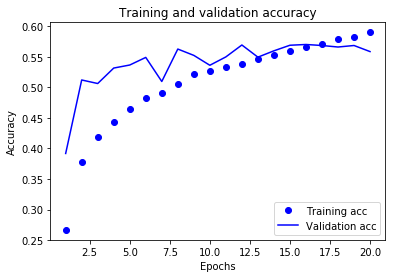

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()